In [3]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import re

import seaborn as sns
sns.set()
sns.set_style('white')

[nltk_data] Downloading package punkt to /Users/cwagen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/cwagen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


11717 tweets in database
9006 original tweets in database

sources:
    Twitter for iPhone           11149 rows
    Twitter Media Studio           118 rows
    Twitter Web App                  4 rows
    Twitter Web Client              48 rows
    Twitter for iPad                38 rows
    Media Studio                   153 rows
    Twitter Ads                     33 rows
    Twitter for Android            174 rows


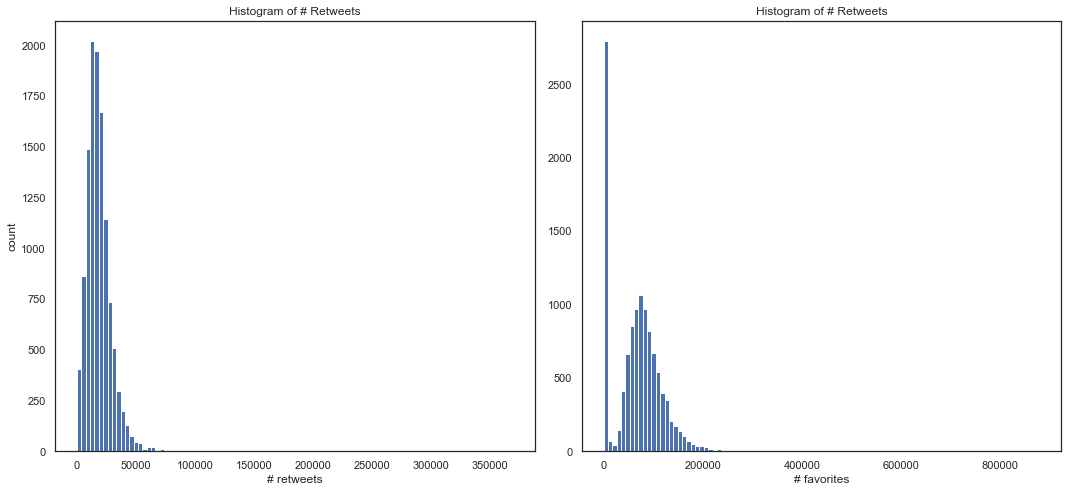

               source                                               text  \
0  Twitter for iPhone  RT @GOPoversight: Days since @RepAdamSchiff le...   
1  Twitter for iPhone  RT @RepMattGaetz: MUST-READ: "Gaetz: 'Donald T...   
2  Twitter for iPhone  RT @RepDougCollins: Adam Schiff wants to impea...   
3  Twitter for iPhone  RT @RepGregPence: After seven weeks of running...   
4  Twitter for iPhone  RT @RepJeffDuncan: Now Pelosi &amp; Schiff wan...   

            created_at  retweet_count  favorite_count is_retweet  \
0  10-30-2019 03:09:07           5818               0       True   
1  10-30-2019 03:09:05           8236               0       True   
2  10-30-2019 03:08:59           9495               0       True   
3  10-30-2019 03:08:54           7861               0       True   
4  10-30-2019 03:08:50           7280               0       True   

                id_str  
0  1189378671326515200  
1  1189378663646711808  
2  1189378636803129344  
3  1189378618838925312  
4  118937

In [4]:
raw_tweets = pd.read_csv('raw_tweets.csv')
print(f"{len(raw_tweets)} tweets in database")
print(f"{len(raw_tweets.loc[raw_tweets.is_retweet == False])} original tweets in database")

print('')
print("sources:")
for source in (raw_tweets.source.unique()):
    count = len(raw_tweets.loc[raw_tweets.source == source])
    print(f"    {source:25s} {count:>8d} rows")
    
fig, axes = plt.subplots(ncols=2,figsize=(15,7))
axes[0].hist(raw_tweets.retweet_count, bins=100)
axes[1].hist(raw_tweets.favorite_count, bins=100)
axes[0].set_title('Histogram of # Retweets')
axes[1].set_title('Histogram of # Retweets')
axes[0].set_ylabel('count')
axes[0].set_xlabel('# retweets')
axes[1].set_xlabel('# favorites')
plt.tight_layout()
plt.show()
print(raw_tweets.head())

In [9]:
tweet_predictors = pd.DataFrame()
tweet_predictors['retweet_count'] = raw_tweets['retweet_count']
tweet_predictors['favorite_count'] = raw_tweets['favorite_count']
tweet_predictors['is_retweet'] = raw_tweets['favorite_count'].astype(int)

hashtag_re = re.compile("#")
mentions_re = re.compile("@")

total_text = pd.DataFrame(columns=['word', 'pos'])

for index, tweet in raw_tweets.iterrows():
    tweet_text = tweet['text']
    words = tweet_text.split()
    hashtags = list(filter(lambda x: hashtag_re.match(x), words))
    mentions = list(filter(lambda x: mentions_re.match(x), words))
    
    clean_text = tweet_text.replace("RT", "Retweet")
    clean_text = clean_text.replace("@", '')
    clean_text = clean_text.replace("#", '')
    clean_text = clean_text.replace("&amp;", '&')
    clean_text = re.sub(r'https:\/\/t.co.*$', '', clean_text)

    tokens = nltk.word_tokenize(clean_text)
    tagged = nltk.pos_tag(tokens)

    dict_to_append = [{'word': x[0], 'pos': x[1]} for x in tagged]
    if len(dict_to_append) > 0:
        total_text = total_text.append(dict_to_append, ignore_index=True)
    
    tweet_predictors.loc[index, 'num_words'] = len(words)
    tweet_predictors.loc[index, 'num_hashtags'] = len(hashtags)
    tweet_predictors.loc[index, 'num_mentions'] = len(mentions)
    tweet_predictors.loc[index, 'clean_text'] = clean_text

print(len(total_text))
#print(tweet_predictors.iloc[0:500].loc[tweet_predictors['num_hashtags'] > 0])

354071


In [59]:
total_text.to_csv('nlp_parsed_words')

In [10]:
tweet_predictors.to_csv('cleaned_tweets')